In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pandas_ta as ta


In [7]:
def date_cutoff(data, start = None, end=None):
    if start:
        start = pd.to_datetime(start)
        if end:
            end = pd.to_datetime(end)
            return data[(data['Date'] >= start) & (data['Date'] < end)]
        else:
            return data[data['Date'] >= start]
    return data

In [102]:
cutoff1 = '1990-01-01'
cutoff2 = '2024-01-01'

In [103]:
data = pd.read_csv('./data/sp500-daily-1990-2024.csv')
data['Date'] = pd.to_datetime(data['Date'])


data = date_cutoff(data, cutoff1, cutoff2)

data['change'] = data['Close'].pct_change()
bears = data[data['change']< -0.03] # change this to -0.1 or something
bears['Date']

150    1990-08-06
475    1991-11-15
1564   1996-03-08
1978   1997-10-27
2171   1998-08-04
          ...    
8158   2022-05-18
8175   2022-06-13
8178   2022-06-16
8227   2022-08-26
8238   2022-09-13
Name: Date, Length: 104, dtype: datetime64[ns]

In [104]:
import pandas_ta as ta

In [105]:
data['RSI'] = ta.rsi(data['Close'])
data['bb_width'] = ta.bbands(data['Close'])['BBB_5_2.0']
data['bb_percent'] = ta.bbands(data['Close'])['BBP_5_2.0']
data['MACD'] = ta.macd(data['Close'])['MACD_12_26_9']
data['MACD hist'] = ta.macd(data['Close'])['MACDh_12_26_9']
data['MACD signal'] = ta.macd(data['Close'])['MACDs_12_26_9']

In [106]:
data

,Date,Close,High,Low,Open,Volume,change,RSI,bb_width,bb_percent,MACD,MACD hist,MACD signal
0,1990-01-02,359.690002,359.690002,351.980011,353.399994,162070000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1990-01-03,358.760010,360.589996,357.890015,359.690002,192330000,-0.002586,NaN,NaN,NaN,NaN,NaN,NaN
2,1990-01-04,355.670013,358.760010,352.890015,358.760010,177000000,-0.008613,NaN,NaN,NaN,NaN,NaN,NaN
3,1990-01-05,352.200012,355.670013,351.350006,355.670013,158530000,-0.009756,NaN,NaN,NaN,NaN,NaN,NaN
4,1990-01-08,353.790009,354.239990,350.540009,352.200012,140110000,0.004514,NaN,3.204087,0.304335,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8560,2023-12-22,4754.629883,4772.939941,4736.770020,4753.919922,3046770000,0.001660,71.069402,1.990722,0.636637,77.173143,3.547671,73.625472
8561,2023-12-26,4774.750000,4784.720215,4758.450195,4758.859863,2513910000,0.004232,72.704374,2.272656,0.742590,77.822249,3.357421,74.464827
8562,2023-12-27,4781.580078,4785.390137,4768.899902,4773.450195,2748450000,0.001430,73.256889,2.469547,0.758819,77.988793,2.819173,75.169621
8563,2023-12-28,4783.350098,4793.299805,4780.979980,4786.439941,2698860000,0.000370,73.407118,1.241841,0.755652,77.371714,1.761675,75.610039


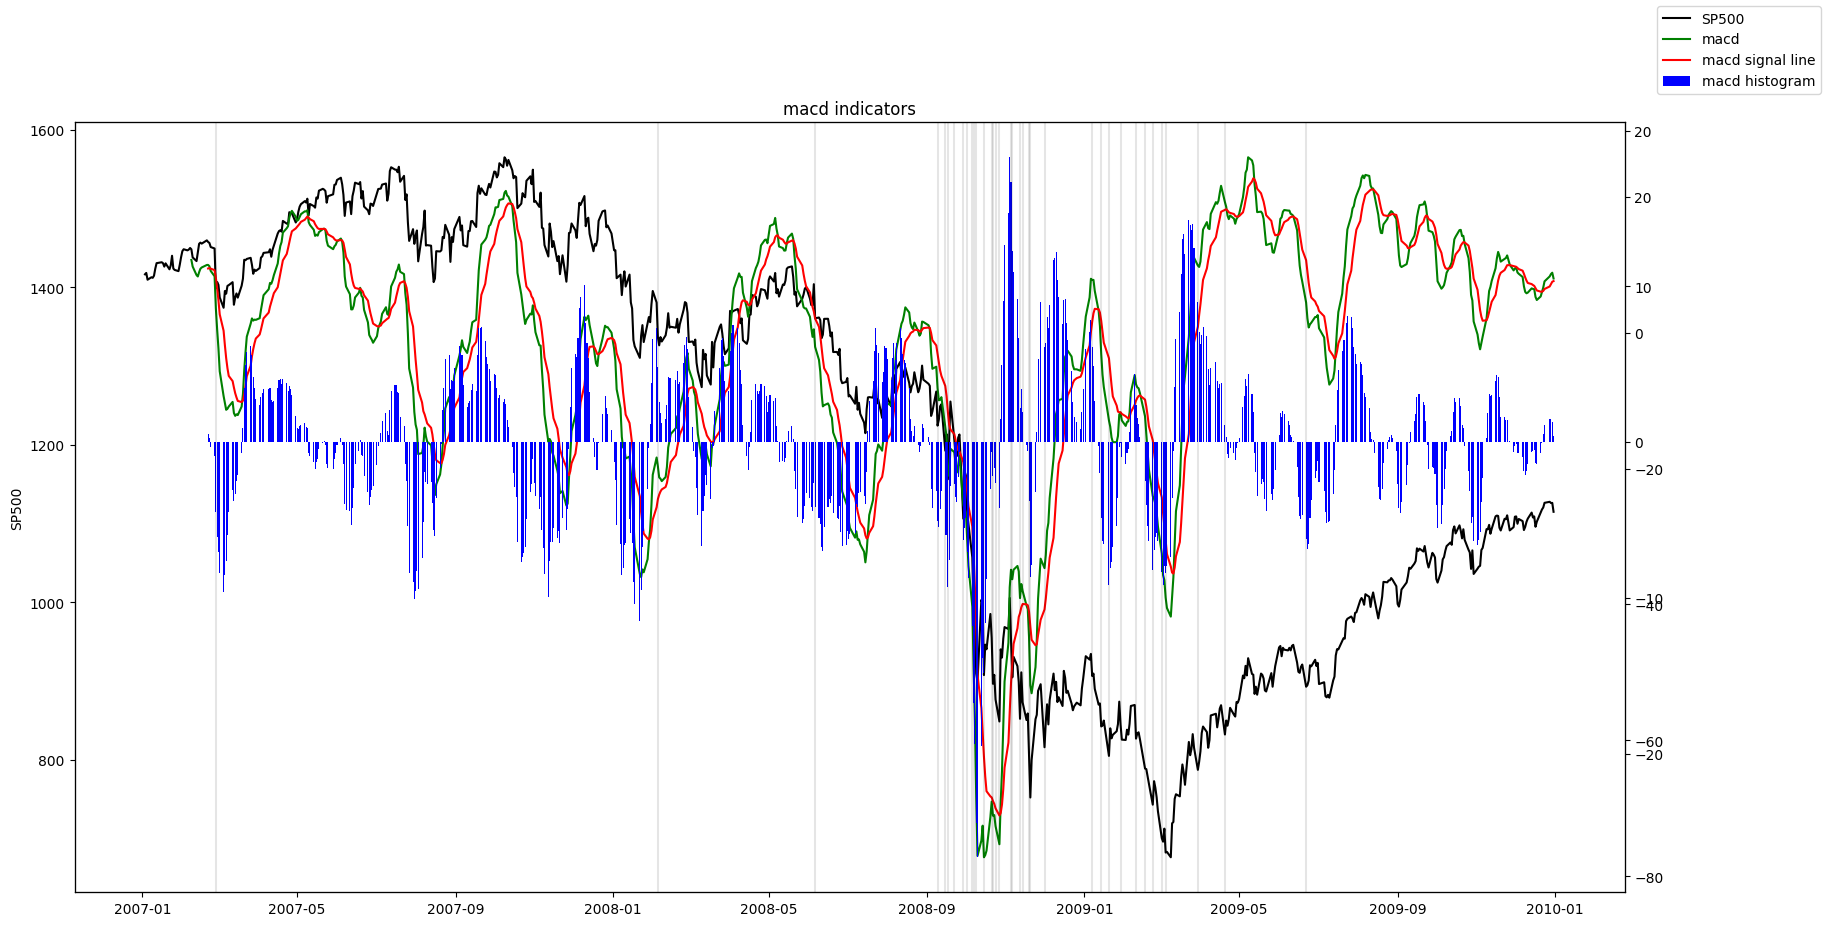

In [99]:
fig, ax = plt.subplots(figsize=(20,10))



ax.plot(data['Date'], data['Close'], color="black", label = 'SP500')
ax.set_ylabel('SP500')

'''
ax2 = ax.twinx()
ax2.plot(data['Date'], data['RSI'], color = "orange", label = 'RSI', linestyle='--')

ax4 = ax.twinx()
ax4.plot(data['Date'], data['bb_width'], color = "pink", label = 'bband width', linestyle='--')

ax5 = ax.twinx()
ax5.plot(data['Date'], data['bb_percent'], color = "purple", label = 'bband %', linestyle='--')
'''

ax5 = ax.twinx()
ax5.plot(data['Date'], data['MACD'], color = "green", label = 'macd', linestyle='-')

ax5.plot(data['Date'], data['MACD signal'], color = "red", label = 'macd signal line', linestyle='-')

ax6 = ax.twinx()
ax6.bar(data['Date'], data['MACD hist'], color = "blue", label = 'macd histogram')


fig.legend()

plt.title('macd indicators')

for drop in bears['Date']:
    plt.axvline(drop, color = 'black', alpha = 0.1)

In [100]:
ta.bbands(data['Close'])

,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0
4287,NaN,NaN,NaN,NaN,NaN
4288,NaN,NaN,NaN,NaN,NaN
4289,NaN,NaN,NaN,NaN,NaN
4290,NaN,NaN,NaN,NaN,NaN
4291,1407.666305,1413.919971,1420.173637,0.884586,0.355286
...,...,...,...,...,...
5038,1100.288935,1116.321997,1132.355059,2.872480,0.816782
5039,1111.084032,1121.384009,1131.683986,1.837012,0.810487
5040,1116.198520,1123.813989,1131.429458,1.355290,0.656652
5041,1120.465789,1125.493994,1130.522200,0.893511,0.592086


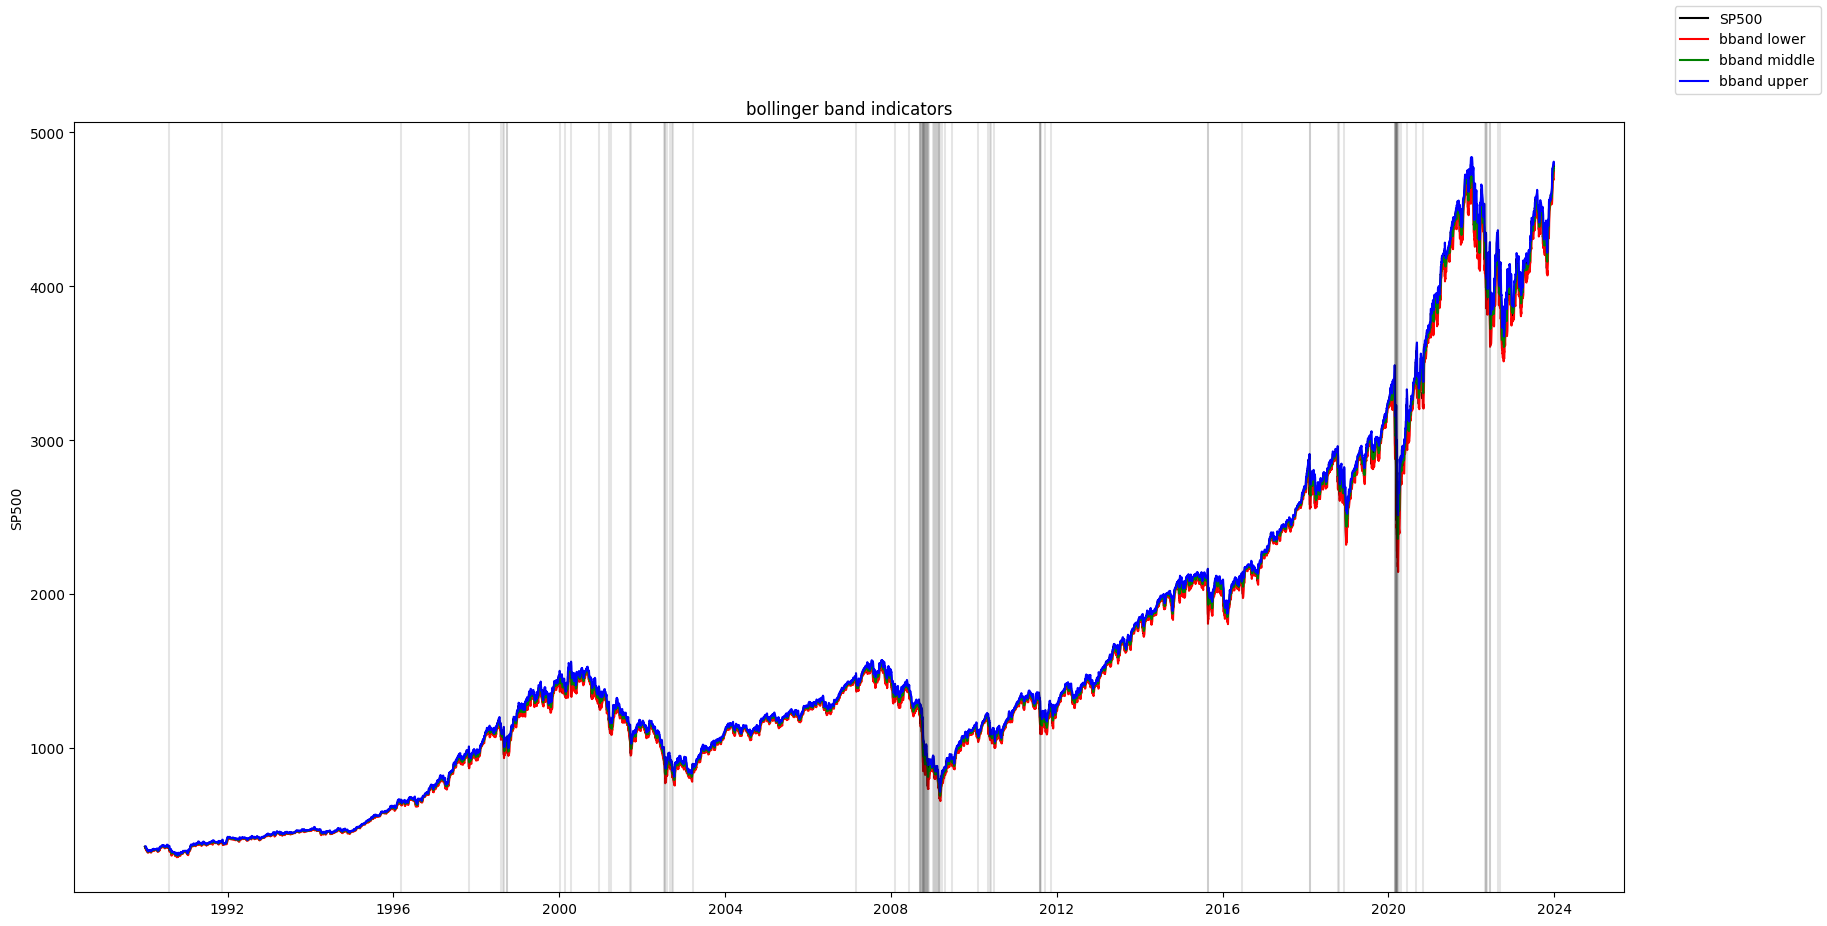

In [107]:
fig, ax = plt.subplots(figsize=(20,10))



ax.plot(data['Date'], data['Close'], color="black", label = 'SP500')
ax.set_ylabel('SP500')

ax.plot(data['Date'], ta.bbands(data['Close'])['BBL_5_2.0'], color = "red", label = 'bband lower', linestyle='-')

ax.plot(data['Date'], ta.bbands(data['Close'])['BBM_5_2.0'], color = "green", label = 'bband middle', linestyle='-')

ax.plot(data['Date'], ta.bbands(data['Close'])['BBU_5_2.0'], color = "blue", label = 'bband upper', linestyle='-')


fig.legend()
plt.title('bollinger band indicators')


for drop in bears['Date']:
    plt.axvline(drop, color = 'black', alpha = 0.1)

In [108]:
data['next'] = data['change'].shift(-1)
data['next dir'] = [1 if i>0 else -1 for i in data['next']]

In [109]:
data.corr()

,Date,Close,High,Low,Open,Volume,change,RSI,bb_width,bb_percent,MACD,MACD hist,MACD signal,next,next dir
Date,1.000000,0.878476,0.878544,0.878380,0.878489,0.826182,0.002227,0.043273,0.054401,0.030277,0.119039,0.007489,0.124719,0.002228,0.010981
Close,0.878476,1.000000,0.999927,0.999934,0.999860,0.602404,0.011268,0.067097,0.002658,0.037139,0.187673,0.019100,0.194632,-0.005370,-0.002601
High,0.878544,0.999927,1.000000,0.999896,0.999946,0.604237,0.003658,0.061860,0.007286,0.031284,0.183568,0.015515,0.191451,-0.004452,-0.002325
Low,0.878380,0.999934,0.999896,1.000000,0.999921,0.600702,0.005137,0.068349,-0.001553,0.034546,0.191635,0.020298,0.198479,-0.004661,-0.002143
Open,0.878489,0.999860,0.999946,0.999921,1.000000,0.602871,-0.002646,0.062721,0.003457,0.028111,0.187151,0.016266,0.195043,-0.004187,-0.002060
Volume,0.826182,0.602404,0.604237,0.600702,0.602871,1.000000,-0.019441,-0.068549,0.291137,-0.020491,-0.044349,-0.048650,-0.031503,-0.000056,0.009083
change,0.002227,0.011268,0.003658,0.005137,-0.002646,-0.019441,1.000000,0.301428,-0.045022,0.623679,0.036098,0.143010,-0.010253,-0.081562,-0.041830
RSI,0.043273,0.067097,0.061860,0.068349,0.062721,-0.068549,0.301428,1.000000,-0.397525,0.572918,0.614647,0.459690,0.502338,-0.038036,-0.028076
bb_width,0.054401,0.002658,0.007286,-0.001553,0.003457,0.291137,-0.045022,-0.397525,1.000000,-0.087547,-0.475582,-0.174047,-0.451343,0.026791,-0.013988
bb_percent,0.030277,0.037139,0.031284,0.034546,0.028111,-0.020491,0.623679,0.572918,-0.087547,1.000000,0.140666,0.300602,0.048070,-0.028449,-0.033209


In [110]:
data

,Date,Close,High,Low,Open,Volume,change,RSI,bb_width,bb_percent,MACD,MACD hist,MACD signal,next,next dir
0,1990-01-02,359.690002,359.690002,351.980011,353.399994,162070000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002586,-1
1,1990-01-03,358.760010,360.589996,357.890015,359.690002,192330000,-0.002586,NaN,NaN,NaN,NaN,NaN,NaN,-0.008613,-1
2,1990-01-04,355.670013,358.760010,352.890015,358.760010,177000000,-0.008613,NaN,NaN,NaN,NaN,NaN,NaN,-0.009756,-1
3,1990-01-05,352.200012,355.670013,351.350006,355.670013,158530000,-0.009756,NaN,NaN,NaN,NaN,NaN,NaN,0.004514,1
4,1990-01-08,353.790009,354.239990,350.540009,352.200012,140110000,0.004514,NaN,3.204087,0.304335,NaN,NaN,NaN,-0.011787,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8560,2023-12-22,4754.629883,4772.939941,4736.770020,4753.919922,3046770000,0.001660,71.069402,1.990722,0.636637,77.173143,3.547671,73.625472,0.004232,1
8561,2023-12-26,4774.750000,4784.720215,4758.450195,4758.859863,2513910000,0.004232,72.704374,2.272656,0.742590,77.822249,3.357421,74.464827,0.001430,1
8562,2023-12-27,4781.580078,4785.390137,4768.899902,4773.450195,2748450000,0.001430,73.256889,2.469547,0.758819,77.988793,2.819173,75.169621,0.000370,1
8563,2023-12-28,4783.350098,4793.299805,4780.979980,4786.439941,2698860000,0.000370,73.407118,1.241841,0.755652,77.371714,1.761675,75.610039,-0.002826,-1


In [77]:
from sklearn.model_selection import train_test_split
# trying different models
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

#regression
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# results
from sklearn.metrics import accuracy_score

In [111]:
data = data.dropna()

In [112]:
data.shape

(8531, 15)

In [113]:
data.columns

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'change', 'RSI',
       'bb_width', 'bb_percent', 'MACD', 'MACD hist', 'MACD signal', 'next',
       'next dir'],
      dtype='object')

In [114]:
X = np.asarray(data[['change', 'RSI',
       'bb_width', 'bb_percent', 'MACD', 'MACD hist', 'MACD signal']])

y_c= np.asarray(data['next dir'])
y_r= np.asarray(data['next'])


X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_c, shuffle=False, test_size=0.2, random_state=0)
X_train__r, X_test__r, y_train__r, y_test_r = train_test_split(X, y_r, shuffle=False, test_size=0.2, random_state=0)

#training

LR = LogisticRegression().fit(X_train_c,y_train_c)
GB = GaussianNB().fit(X_train_c, y_train_c)
QB = QuadraticDiscriminantAnalysis().fit(X_train_c, y_train_c)
KNN = KNeighborsClassifier().fit(X_train_c, y_train_c)

LinR = LinearRegression().fit(X_train__r, y_train__r)
RF = RandomForestRegressor().fit(X_train__r, y_train__r)
GBR = GradientBoostingRegressor().fit(X_train__r, y_train__r)
SVM = SVR().fit(X_train__r, y_train__r)

#PREDICTION
yhatLR = LR.predict(X_test_c)
yhatGB = GB.predict(X_test_c)
yhatQB = QB.predict(X_test_c)
yhatKNN = KNN.predict(X_test_c)

yhatLinR = LinR.predict(X_test__r)
yhatRF = RF.predict(X_test__r)
yhatGBR = GBR.predict(X_test__r)
yhatSVM = SVM.predict(X_test__r)


# precision
print("---CLASSIFICATION PREDICTION")
print(f"Logistic regression: {accuracy_score(y_test_c, yhatLR)*100}%")
print(f"Naive Bayes: {accuracy_score(y_test_c, yhatGB)*100}%")
print(f"QDA: {accuracy_score(y_test_c, yhatQB)*100}%")
print(f"KNN: {accuracy_score(y_test_c, yhatKNN)*100}%")



c:\Users\vflip\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Users\vflip\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


---CLASSIFICATION PREDICTION
Logistic regression: 54.54012888107791%
Naive Bayes: 48.56473345049795%
QDA: 50.73227885178676%
KNN: 49.73637961335677%


In [115]:
from sklearn.metrics import mean_squared_error, r2_score

print("---REGRESSION PREDICTION")
print(f"Linear regression MSE: {mean_squared_error(y_test_r, yhatLinR)}")
print(f"Random Forest MSE: {mean_squared_error(y_test_r, yhatRF)}")
print(f"Gradient Boosting MSE: {mean_squared_error(y_test_r, yhatGBR)}")
print(f"SVM MSE: {mean_squared_error(y_test_r, yhatSVM)}")

print(f"Linear regression R2: {r2_score(y_test_r, yhatLinR)}")
print(f"Random Forest R2: {r2_score(y_test_r, yhatRF)}")
print(f"Gradient Boosting R2: {r2_score(y_test_r, yhatGBR)}")
print(f"SVM R2: {r2_score(y_test_r, yhatSVM)}")

---REGRESSION PREDICTION
Linear regression MSE: 0.00015242802970554014
Random Forest MSE: 0.0003207156267495089
Gradient Boosting MSE: 0.0004640021326028985
SVM MSE: 0.0002932582079743686
Linear regression R2: -0.0038887643586171805
Random Forest R2: -1.1122284062191872
Gradient Boosting R2: -2.0559112287833816
SVM R2: -0.9313942495361869


In [117]:
def check_indiv(last):
    print("Data: \n", data.iloc[last])
    print("\nParam used: ", X[last])
    
    print("\n\nLR prediction: ", LR.predict_proba(X[[last]])*100, LR.predict([X[last]]))
    print("\nGB prediction: ", GB.predict_proba(X[[last]])*100, GB.predict([X[last]]))
    print("\nQDA prediction: ", QB.predict_proba(X[[last]])*100, QB.predict([X[last]]))
    print("\nKNN prediction: ", KNN.predict_proba(X[[last]])*100, KNN.predict([X[last]]))
    print("\n\n")
    print("\nLinR prediction: ", LinR.predict([X[last]]))
    print("\nRF prediction: ", RF.predict([X[last]]))
    print("\nGBR prediction: ", GBR.predict([X[last]]))
    print("\nSVM prediction: ", SVM.predict([X[last]]))
    print("\n\n")

check_indiv(-2)  # Check the last entry in the dataset

Data: 
 Date           2023-12-27 00:00:00
Close                  4781.580078
High                   4785.390137
Low                    4768.899902
Open                   4773.450195
Volume                  2748450000
change                     0.00143
RSI                      73.256889
bb_width                  2.469547
bb_percent                0.758819
MACD                     77.988793
MACD hist                 2.819173
MACD signal              75.169621
next                       0.00037
next dir                         1
Name: 8562, dtype: object

Param used:  [1.43045775e-03 7.32568891e+01 2.46954745e+00 7.58818523e-01
 7.79887933e+01 2.81917278e+00 7.51696206e+01]


LR prediction:  [[46.21396213 53.78603787]] [1]

GB prediction:  [[91.85946582  8.14053418]] [-1]

QDA prediction:  [[3.42627597e-11 1.00000000e+02]] [1]

KNN prediction:  [[100.   0.]] [-1]




LinR prediction:  [0.0002252]

RF prediction:  [-0.00575765]

GBR prediction:  [-0.00208694]

SVM prediction:  [0.01272529